In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [96]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [97]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data (1).csv


In [98]:
df=pd.read_csv('data.csv')

In [99]:
df.head(100)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86208,M,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,NaN
96,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,NaN
97,862261,B,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,...,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,NaN
98,862485,B,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,NaN


In [100]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


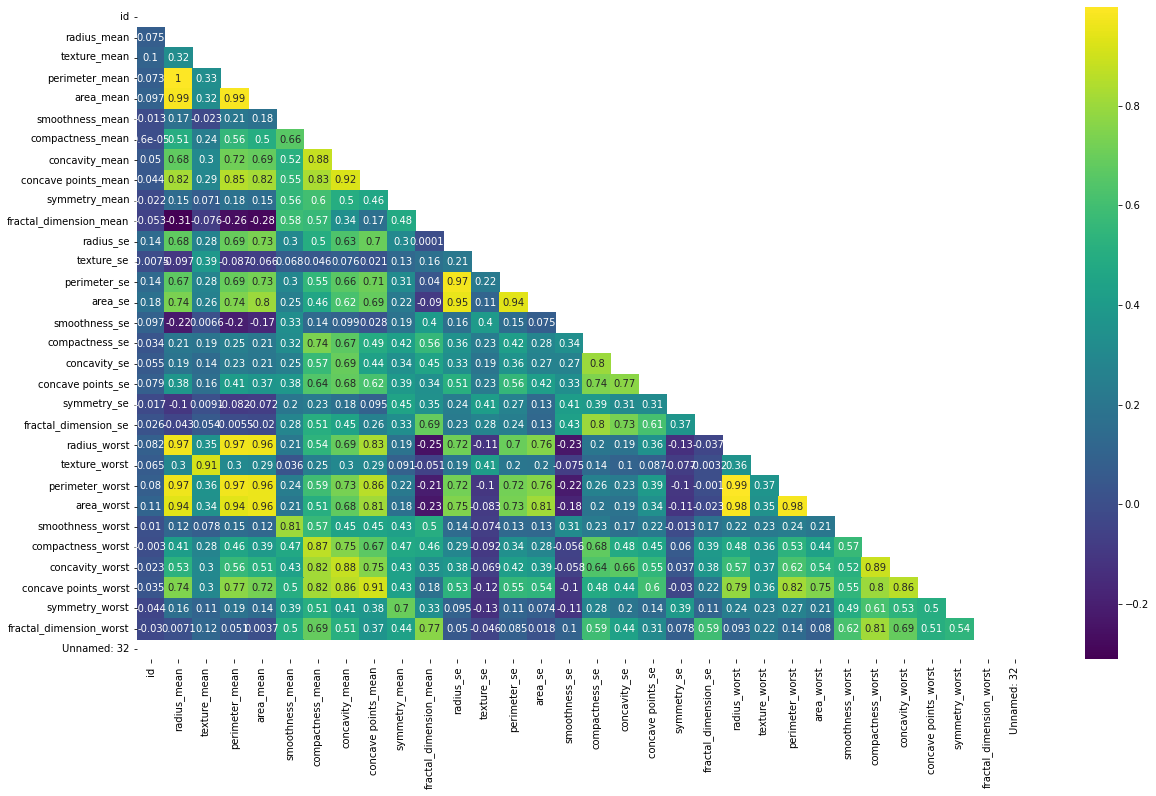

In [101]:
plt.figure(figsize=(20,12))
# correlation matrix
corr = df.corr()
# upper triangle is marked
marked_matrix = np.triu(corr)
# plot heatmap
sns.heatmap(data = corr, cmap='viridis', annot=True, mask = marked_matrix) 

In [102]:
df = df.drop(["Unnamed: 32"], axis=1)

In [103]:
corr = df.corr()
corr_abs = corr.abs()
upper_triangle = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))

dropped_columns = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.85)] 
dropped_columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


['perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [104]:
len(dropped_columns)

13

In [105]:
X = df.drop("diagnosis", axis = 1)

# Target
y = df["diagnosis"]

In [106]:
y.unique()

array(['M', 'B'], dtype=object)

In [107]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


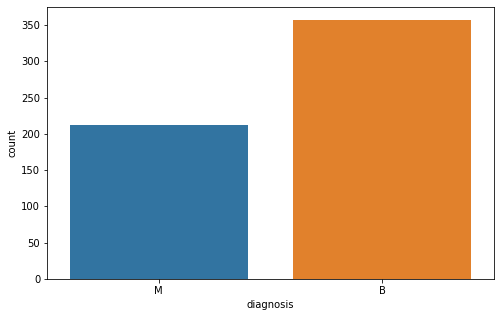

In [108]:
# figure size
plt.figure(figsize=(8, 5))
sns.countplot(y)

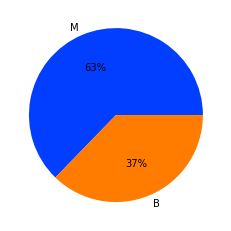

In [109]:
# declaring data
data = y.value_counts()
keys = y.unique()
  
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [111]:
# Create an object of StandardScaler
scaler = StandardScaler()

# We only fit to the training data, not test data.
scaled_X_train = scaler.fit_transform(X_train)

# We transform but not fit the test data.
scaled_X_test = scaler.transform(X_test)

In [112]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [113]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (31, 398)
x test:  (31, 171)
y train:  (398,)
y test:  (171,)


In [114]:
def initialize_weights_and_bias(dimension):
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight, bias

In [115]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [116]:
def forward_backward_propagation(weight,bias,X_train,y_train):
  z = np.dot(weight.T,X_train) + bias
  y_head = sigmoid(z)
  loss = y_train*np.log(y_head)- (1-y_train)*np.log(1-y_head)
  cost = (np.sum(loss))/X_train.shape[1]      
  derivative_weight = (np.dot(X_train,((y_head-y_train).T)))/X_train.shape[1]
  derivative_bias = np.sum(y_head-y_train)/X_train.shape[1]                 
  gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
  return cost,gradients

In [117]:
def update(weight, bias, X_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
   
    for i in range(number_of_iterarion):
      cost,gradients = forward_backward_propagation(weight,bias,X_train,y_train)
      cost_list.append(cost)
      weight = weight - learning_rate * gradients["derivative_weight"]
      bias = bias - learning_rate * gradients["derivative_bias"]
      if i % 10 == 0:
        cost_list2.append(cost)
        index.append(i)
        print ("Cost after iteration %i: %f" %(i, cost))
    parameters = {"weight": weight,"bias": bias}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [124]:
def predict(weight,bias,X_test):
    z = sigmoid(np.dot(weight.T,X_test)+bias)
    Y_prediction = np.zeros((1,X_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [126]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(X_train.T, y_train.T).score(X_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(X_train.T, y_train.T).score(X_train.T, y_train.T)))

test accuracy: 0.6140350877192983 
train accuracy: 0.6331658291457286 
